# Part II - (Ford GoBike System Dataset Exploration)
## by (Akbarshox)

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> This Dataset contains details of individuals borrowed bikes from a bike-sharing system (called Ford GoBike System) covering the greater San Francisco Bay area.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("explanationdata.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Length of trip

Duration of trips takes values,from  to  seconds,Afer using logarithmic scaling,distribution become unimodal.Most members borrow bikes for around 500 seconds,There are 2 red lines which shows where 95 percent of distribution lies,It is between about 120 and 2000.

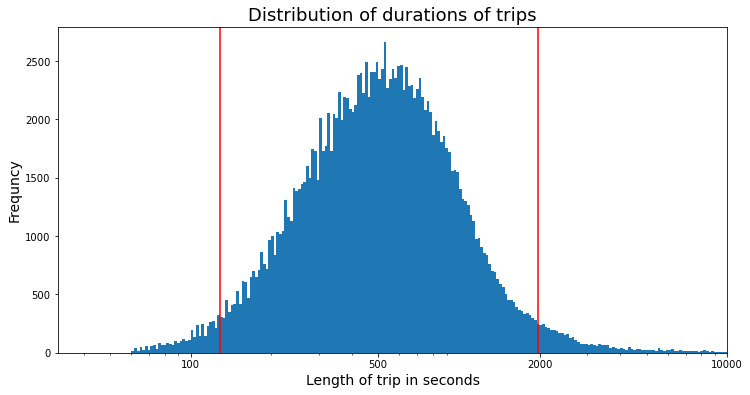

In [15]:
bins=10**np.arange(1.7,5+0.5+0.01,0.01)
plt.figure(figsize=(12,6))
plt.hist(df.duration_sec,bins=bins);
ticks=[100,500,2000,10000,85000]
labels=[f"{x}" for x in ticks]
plt.xscale("log")
plt.axvline(np.percentile(df.duration_sec,2.25),color="r")
plt.axvline(np.percentile(df.duration_sec,97.25),color="r")
plt.title("Distribution of durations of trips",fontsize=18)
plt.xlabel("Length of trip in seconds",fontsize=14)
plt.ylabel("Frequncy",fontsize=14)
plt.xticks(ticks,labels)
np.percentile(df.duration_sec,97.25)
plt.xlim(32,10000)
plt.show()

## Distribution of Gender

Pie chart shows that most frequntly rides taken by men (74.6%,130651) and women are in the second place(23.3,40844).We also have third group which is called Other(2.1%,3652),I think they are people about whose gender there is not information.

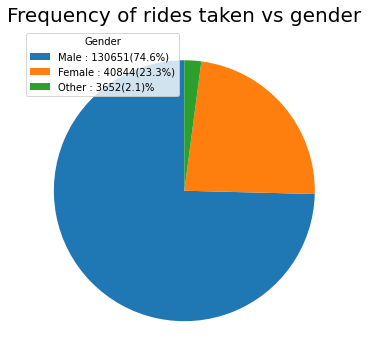

In [16]:
data=df.member_gender.value_counts()
base_color=sb.color_palette()[0]
data_p=((df.member_gender.value_counts()/df.member_gender.value_counts().sum())*100).round(1)
plt.figure(figsize=(10,6))
plt.title("Frequency of rides taken vs gender",fontsize=20)
plt.pie(data,startangle=90)
plt.legend([f"Male : {data.values[0]}({data_p.values[0]}%)",f"Female : {data.values[1]}({data_p.values[1]}%)",f"Other : {data.values[2]}({data_p.values[2]})%"],title="Gender",loc=2)
plt.show()

## Average trip duration Vs Gender

The highest average trip length is in other whose gender is not defined with average about 990 seconds ,and in the second place ,it is surprisng,is women with average 790 seconds and last one is men with average 670 seconds.According to this we can conclude that men takes rides more,but not long.   

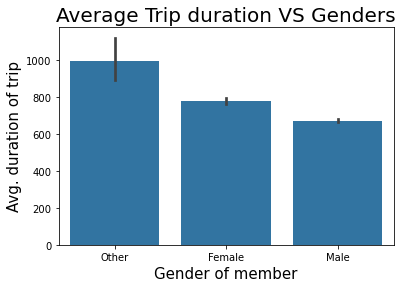

In [17]:
order=df.groupby("member_gender").mean()["duration_sec"].sort_values(ascending=False).index
def barplot(df,x,y,order):
    sb.barplot(data=df,x=x,y=y,color=base_color,order=order)
    
barplot(df,"member_gender","duration_sec",order)
plt.title("Average Trip duration VS Genders",fontsize=20)
plt.xlabel("Gender of member",fontsize=15)
plt.ylabel("Avg. duration of trip",fontsize=15)
plt.show()


## Average trip duration Vs Days of Week

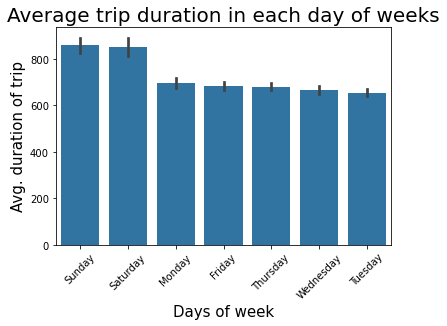

In [19]:
order=df.groupby("weekday").mean()["duration_sec"].sort_values(ascending=False).index
barplot(df,"weekday","duration_sec",order)
plt.title("Average trip duration in each day of weeks",fontsize=20)
plt.xlabel("Days of week",fontsize=15)
plt.ylabel("Avg. duration of trip",fontsize=15)
plt.xticks(rotation=45)
plt.show()

## Average trip duration Vs Days of Week Vs Gender

In this visualization, we can see that the highest overall avegrage is in other and second place for women and last one is men.They all have the same pattern between Monday an Saturday,but in sunday both other and female rise when men fall.

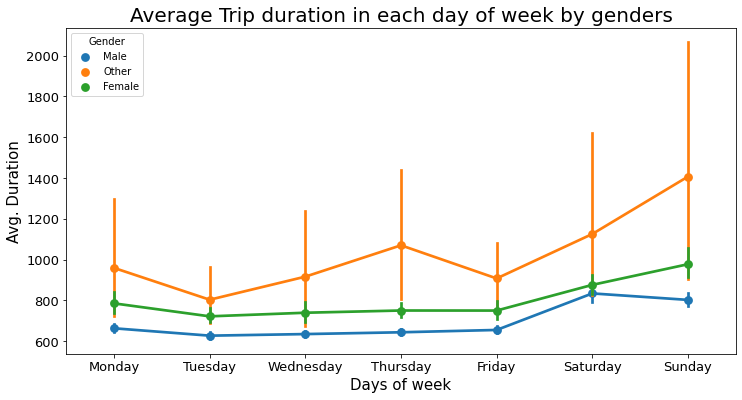

In [20]:
plt.figure(figsize=(12,6))
sb.pointplot(data=df,x="weekday",y="duration_sec",hue="member_gender",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ci=95)
plt.title("Average Trip duration in each day of week by genders",fontsize=20)
plt.xlabel("Days of week",fontsize=15)
plt.ylabel("Avg. Duration",fontsize=15)
plt.legend(title="Gender")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [21]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

ЌҐ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© д ©«.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 